In [172]:
!pip install datasets

In [173]:
!pip install wordcloud

In [174]:
import pandas as pd
import numpy as np
import seaborn as sns
from wordcloud import WordCloud
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve, accuracy_score, classification_report, f1_score
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from indicnlp.tokenize import indic_tokenize
import re
import os
import nltk
import numpy as np
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import SnowballStemmer

[nltk_data] Downloading package punkt to C:\Users\My
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\My
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\My
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [175]:
df = pd.read_csv('data-augmented.csv',usecols=['labels','text','text_hi','text_bn','text_ur','text_pa','text_mr'])
# text - English data
# text_hi - Hindi data
# text_bn - Bengali data
# text_ur - Urdu data
# text_pa - Punjabi data
# text_mr - Marathi data

In [176]:
df

,labels,text,text_hi,text_bn,text_ur,text_pa,text_mr
0,ham,"Go until jurong point, crazy.. Available only ...","Dakag बिंदु तक जाओ, पागल. केवल Bag Non महान वि...",যান যান যান যান যান যান যান যান যান যান যান যা...,جاؤ جب تک جورج پوائنٹ، پاگل.. دستیاب صرف میں b...,ਗਾਹਕ 'ਤੇ ਗਾਹਕ 'ਤੇ ਗਾਹਕ 'ਤੇ ਗਾਹਕ 'ਤੇ ਗਾਹਕ 'ਤੇ ਗ...,"जॉर्ज बिंदुपर्यंत जा, पागल.. उपलब्ध फक्त bugis..."
1,ham,Ok lar... Joking wif u oni...,ओके लामर.... if if uue पर.,হ্যাঁ হ্যাঁ হ্যাঁ হ্যাঁ হ্যাঁ হ্যাঁ হ্যাঁ হ্যা...,ہا ہا ہا ہا ہا ہا ہا ہا ہا ہا ہا ہا ہا ہا ہا,OK lar... Joking wif u oni...,"शंका आहोत, शंका आहोत, शंका आहोत..."
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Fktatatat 21 मई को प्राप्त करने के लिए मुफ्त प...,বিনামূল্যে প্রবেশ 2 a wkly comp বিজয় FA কাপ ফ...,مفت انٹرویو میں 2 a wkly comp جیتنے کے لئے FA ...,Free entry in 2 a wkly comp to win FA Cup fina...,मुक्त प्रवेश 2 a wkly comp विजेता FA कप फाइनल ...
3,ham,U dun say so early hor... U c already then say...,Uden इतना जल्दी कहते हैं... तो पहले से ही यूसी...,কখনো কখনো কখনো কখনো কখনো কখনো কখনো কখনো কখনো ক...,U dun کہتے ہیں اتنا جلدی hor... U c پہلے ہی کہ...,U dun says so early hor... U c already then sa...,त्याचबरोबरच त्याचबरोबरच त्याचबरोबरच त्याचबरोबर...
4,ham,"Nah I don't think he goes to usf, he lives aro...","नहीं, मुझे नहीं लगता कि वह हमारे लिए चला जाता ...","আমি মনে করি তিনি ইউএসএফে যেতে পারবেন না, তিনি ...",مجھے نہیں لگتا کہ وہ یو ایس ایف میں جا رہا ہے،...,"ਹੈ, ਮੈਨੂੰ ਇਸ ਨੂੰ usf ਵਿੱਚ ਜਾ ਰਿਹਾ ਹੈ ਨਾ ਹੈ, ਇਸ...","मला वाटत नाही की, तो यूएसएफमध्ये जातो, पण तिथे..."
...,...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,यह 2 सेकंड है जब हमने 2 संपर्क की कोशिश की है....,এটাই দ্বিতীয়বার আমরা চেষ্টা করেছি 2 যোগাযোগ u...,یہ 2 بار ہم نے کوشش کی ہے 2 رابطے u. U نے جیت ...,This is the 2nd time we have tried 2 contacts ...,हा दुसरा वेळ आहे आपण प्रयत्न केला 2 संपर्क u. ...
5568,ham,Will ü b going to esplanade fr home?,क्या कलाई घर का पता लगाने के लिए जा रही होगी?,‘ব’ কি বাড়ি ফিরে আসবে?,کیا بی بی کو گھر سے نکال دیا جائے گا؟,ਬੁਨਿਆਦੀ ਬੁਨਿਆਦੀ ਬੁਨਿਆਦੀ ਬੁਨਿਆਦੀ ਬੁਨਿਆਦੀ ਬੁਨਿਆਦੀ,‘बी’ घरी जाणार का?
5569,ham,"Pity, * was in mood for that. So...any other s...","तो फिर, दूसरे सुझाव क्या हैं?","অসুবিধা, * এর জন্য মস্তিষ্ক ছিল. তাই... অন্য ক...",معذرت، * اس کے لئے مزاج میں تھا ۔ لہذا ... کچھ...,"ਪਸੰਦ, * ਇਸ ਲਈ ਹਿੱਸਾ ਹੈ. ਇਸ ਲਈ... ਹੋਰ suggestions?",यासाठी कदाचित कदाचित कदाचित कदाचित कदाचित कदाच...
5570,ham,The guy did some bitching but I acted like i'd...,आदमी कुछ कुतियािंग किया लेकिन मैं मैं कुछ और ख...,"ছেলেটি কিছু বিটিং করেন, কিন্তু আমি মনে করি আমি...",آدمی نے کچھ بٹچ کیا لیکن میں نے اس طرح کام کیا...,"ਇਸ ਨੂੰ ਕੁਝ bitching ਕੀਤਾ ਹੈ, ਪਰ ਮੈਨੂੰ ਇਸ ਨੂੰ ਖ...",त्या माणसाने थोडी बटचिंग केली पण मला वाटलं की ...


In [177]:
num_rows, num_columns = df.shape

print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 5572
Number of columns: 7


In [178]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   labels   5572 non-null   object
 1   text     5572 non-null   object
 2   text_hi  5572 non-null   object
 3   text_bn  5572 non-null   object
 4   text_ur  5572 non-null   object
 5   text_pa  5572 non-null   object
 6   text_mr  5572 non-null   object
dtypes: object(7)
memory usage: 304.8+ KB


None

In [179]:
# Checking for missing values
missing_data = df.isnull().sum()
print(missing_data)
df.dropna(inplace=True)

labels     0
text       0
text_hi    0
text_bn    0
text_ur    0
text_pa    0
text_mr    0
dtype: int64


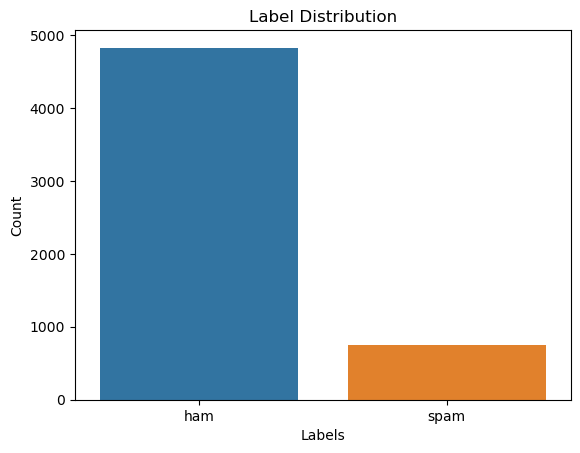

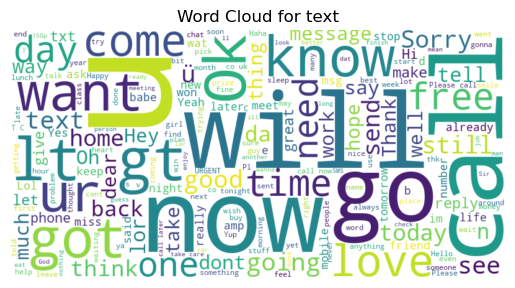

In [180]:
def plot_label_distribution(df):
    sns.countplot(x='labels', data=df)
    plt.title("Label Distribution")
    plt.xlabel("Labels")
    plt.ylabel("Count")
    plt.show()
    
def plot_word_cloud(df, column_name):
    text = ' '.join(df[column_name].tolist())
    wordcloud = WordCloud(background_color='white', width=800, height=400).generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for {column_name}")
    plt.show()
    
plot_label_distribution(df)

plot_word_cloud(df,'text') 

In [181]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

nltk.download("stopwords", quiet=True)

def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-z0-9\s]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    stop_words = set(stopwords.words("english"))
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text

text_columns = ["text", "text_hi", "text_bn", "text_ur", "text_pa", "text_mr"]

results = {}

for col in text_columns:
    df[col + "_cleaned"] = df[col].apply(clean_text)
    
    X_train, X_test, y_train, y_test = train_test_split(
        df[col + "_cleaned"], df["labels"], test_size=0.2, random_state=42
    )
    
    # Created a TF-IDF Vectorizer
    tfidf = TfidfVectorizer(max_features=5000) 
    X_train_tfidf = tfidf.fit_transform(X_train) 
    X_test_tfidf = tfidf.transform(X_test)

In [182]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)  

nb_predictions = nb_model.predict(X_test_tfidf)
nb_accuracy = accuracy_score(y_test, nb_predictions) 

print("\nNaive Bayes Model:")
print(f"Accuracy: {nb_accuracy * 100:.2f}%")
print(classification_report(y_test, nb_predictions))



Naive Bayes Model:
Accuracy: 92.02%
              precision    recall  f1-score   support

         ham       0.92      1.00      0.96       966
        spam       0.97      0.42      0.58       149

    accuracy                           0.92      1115
   macro avg       0.94      0.71      0.77      1115
weighted avg       0.92      0.92      0.91      1115



In [183]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000)  
lr_model.fit(X_train_tfidf, y_train) 
lr_predictions = lr_model.predict(X_test_tfidf) 
lr_accuracy = accuracy_score(y_test, lr_predictions) 

print("\nLogistic Regression Model:")
print(f"Accuracy: {lr_accuracy * 100:.2f}%")
print(classification_report(y_test, lr_predictions))



Logistic Regression Model:
Accuracy: 92.65%
              precision    recall  f1-score   support

         ham       0.92      1.00      0.96       966
        spam       0.97      0.46      0.63       149

    accuracy                           0.93      1115
   macro avg       0.95      0.73      0.79      1115
weighted avg       0.93      0.93      0.91      1115



In [184]:
from sklearn.svm import SVC

svm_model = SVC(kernel="linear", C=1) 
svm_model.fit(X_train_tfidf, y_train) 

svm_predictions = svm_model.predict(X_test_tfidf)  
svm_accuracy = accuracy_score(y_test, svm_predictions) 

print("\nSVM Model:")
print(f"Accuracy: {svm_accuracy * 100:.2f}%")
print(classification_report(y_test, svm_predictions))



SVM Model:
Accuracy: 96.05%
              precision    recall  f1-score   support

         ham       0.96      0.99      0.98       966
        spam       0.96      0.74      0.83       149

    accuracy                           0.96      1115
   macro avg       0.96      0.87      0.91      1115
weighted avg       0.96      0.96      0.96      1115



In [185]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100)  
rf_model.fit(X_train_tfidf, y_train) 

rf_predictions = rf_model.predict(X_test_tfidf)  
rf_accuracy = accuracy_score(y_test, rf_predictions)  

print("\nRandom Forest Model:")
print(f"Accuracy: {rf_accuracy * 100:.2f}%")
print(classification_report(y_test, rf_predictions))



Random Forest Model:
Accuracy: 95.61%
              precision    recall  f1-score   support

         ham       0.96      0.99      0.98       966
        spam       0.95      0.70      0.81       149

    accuracy                           0.96      1115
   macro avg       0.96      0.85      0.89      1115
weighted avg       0.96      0.96      0.95      1115



In [186]:
print("Data type of y_train:", y_train.dtype)
print("Data type of y_test:", y_test.dtype)  

Data type of y_train: object
Data type of y_test: object


In [187]:
def convert_to_numeric(label):
    if isinstance(label, str): 
        return 1 if label.lower() == "spam" else 0
    return label  

y_train = y_train.apply(convert_to_numeric)
y_test = y_test.apply(convert_to_numeric)

print("Data type of y_train after conversion:", y_train.dtype)


Data type of y_train after conversion: int64


In [188]:
lstm_model = keras.Sequential([
    layers.Embedding(input_dim=5000, output_dim=128, input_length=max_length),  # Embedding layer
    layers.LSTM(64),  # LSTM layer with 64 units
    layers.Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # Compile with adam optimizer

lstm_model.fit(X_train_padded, y_train, epochs=30, batch_size=32, validation_split=0.2)  # Adjust epochs and batch size as needed


Epoch 1/30
112/112 [==============================] - 6s 43ms/step - loss: 0.2527 - accuracy: 0.9055 - val_loss: 0.1775 - val_accuracy: 0.9372
Epoch 2/30
112/112 [==============================] - 4s 38ms/step - loss: 0.1200 - accuracy: 0.9627 - val_loss: 0.1253 - val_accuracy: 0.9552
Epoch 3/30
112/112 [==============================] - 4s 39ms/step - loss: 0.0687 - accuracy: 0.9823 - val_loss: 0.1231 - val_accuracy: 0.9540
Epoch 4/30
112/112 [==============================] - 4s 40ms/step - loss: 0.0534 - accuracy: 0.9902 - val_loss: 0.1277 - val_accuracy: 0.9540
Epoch 5/30
112/112 [==============================] - 5s 40ms/step - loss: 0.0512 - accuracy: 0.9905 - val_loss: 0.1278 - val_accuracy: 0.9518
Epoch 6/30
112/112 [==============================] - 5s 41ms/step - loss: 0.0480 - accuracy: 0.9916 - val_loss: 0.1432 - val_accuracy: 0.9518
Epoch 7/30
112/112 [==============================] - 5s 44ms/step - loss: 0.0473 - accuracy: 0.9913 - val_loss: 0.1437 - val_accuracy: 0.9484

In [189]:
lstm_predictions = lstm_model.predict(X_test_padded)

lstm_predictions_binary = (lstm_predictions > 0.5).astype(int)

lstm_accuracy = accuracy_score(y_test, lstm_predictions_binary)

print("\nLSTM Model:")
print(f"Accuracy: {lstm_accuracy * 100:.2f}%")  
print(classification_report(y_test, lstm_predictions_binary))  

35/35 [==============================] - 1s 11ms/step

LSTM Model:
Accuracy: 95.96%
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       966
           1       0.91      0.77      0.84       149

    accuracy                           0.96      1115
   macro avg       0.94      0.88      0.91      1115
weighted avg       0.96      0.96      0.96      1115



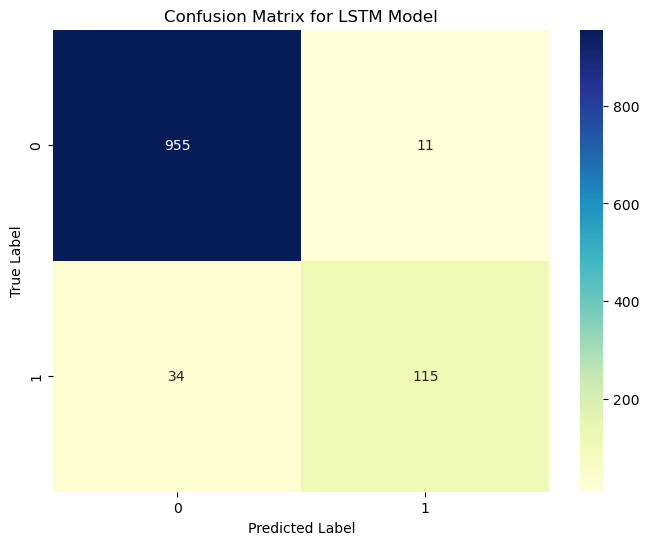

In [190]:
from sklearn.metrics import confusion_matrix

lstm_confusion_matrix = confusion_matrix(y_test, lstm_predictions_binary)

plt.figure(figsize=(8, 6))
sns.heatmap(lstm_confusion_matrix, annot=True, fmt="d", cmap="YlGnBu")  
plt.title("Confusion Matrix for LSTM Model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [191]:
import pandas as pd

accuracy_scores = {
    "Naive Bayes": nb_accuracy, 
    "Logistic Regression": lr_accuracy,
    "SVM": svm_accuracy,  
    "Random Forest": rf_accuracy, 
    "LSTM": lstm_accuracy  
}

accuracy_df = pd.DataFrame(list(accuracy_scores.items()), columns=["Model", "Accuracy"])

print(accuracy_df)


                 Model  Accuracy
0          Naive Bayes  0.920179
1  Logistic Regression  0.926457
2                  SVM  0.960538
3        Random Forest  0.956054
4                 LSTM  0.959641


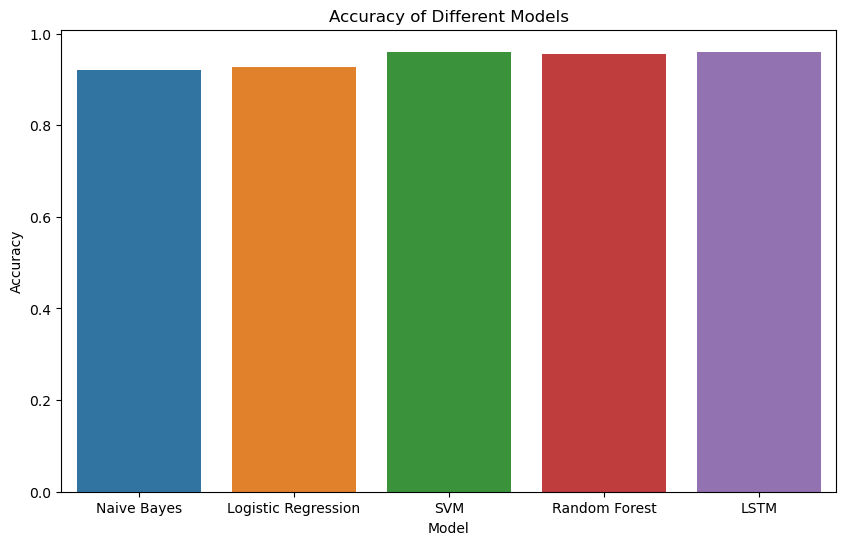

In [192]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6)) 
sns.barplot(x="Model", y="Accuracy", data=accuracy_df) 
plt.title("Accuracy of Different Models") 
plt.xlabel("Model") 
plt.ylabel("Accuracy")  
plt.show()

In [193]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

def pred(text):
    
    padded_text = pad_sequences(sequences, maxlen=100, padding='post')
    
    result = lstm_model.predict(padded_text)
    
    prediction_value = result[0][0]
    return "spam" if prediction_value > 0.5 else "ham"

texts_to_predict = [
    "sale is live",
    "This is the best offer for you",
    "Meet me at the station at 5 pm"
]

for text in texts_to_predict:
    prediction = pred(text)
    print(f"Prediction for '{text}': {prediction}")


1/1 [==============================] - 0s 32ms/step
Prediction for 'sale is live': ham
1/1 [==============================] - 0s 26ms/step
Prediction for 'This is the best offer for you': ham
1/1 [==============================] - 0s 25ms/step
Prediction for 'Meet me at the station at 5 pm': ham
